Robert Steward
Assignment 2
Traveling Salesman and 4pks problem implementation

In [2]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install mlrose

Note: you may need to restart the kernel to use updated packages.


In [6]:
import six
import sys
import os
import numpy as np
import time
import math
import random

sys.modules['sklearn.externals.six'] = six
import mlrose

In [3]:
from ipynb.fs.full.mlrose_code import mimic
from ipynb.fs.full.mlrose_code import simulated_annealing
from ipynb.fs.full.mlrose_code import random_hill_climb
from ipynb.fs.full.mlrose_code import FourPeaks


In [20]:
def mix_coords(input_arr):
    output=[]
    leng=len(input_arr)
    indices=list(range(leng))
    random.shuffle(indices)
    for i in range(leng):
        output.append(input_arr[indices[i]])
    return output
    

sides=8
angle=360/sides
angles=[]
coords_list=[]
for i in range(sides):
    angles.append((i+1)*angle*math.pi/180)
    coord=(round(math.cos(i*angle*math.pi/180),2),round(math.sin(i*angle*math.pi/180),2))
    coords_list.append(coord) 
perm=sides*((coords_list[0][0]-coords_list[1][0])**2+(coords_list[0][1]-coords_list[1][1])**2)**.5  
coords_list =mix_coords(coords_list)
print(perm)

len(coords_list)
#print(len(coords_list))
# Initialize fitness function object using coords_list


6.135535836420484


8

In [27]:
#RHC
side_array=[5,10,15,20]
time_array=[]
results_array=[]
iterations=100

for j in range(len(side_array)):
    calc_sum=0
    time_sum=0
    sides=side_array[j]
    angle=360/sides
    angles=[]
    coords_list=[]
    for i in range(sides):
        angles.append((i+1)*angle*math.pi/180)
        coord=(round(math.cos(i*angle*math.pi/180),2),round(math.sin(i*angle*math.pi/180),2))
        coords_list.append(coord) 
    perm=sides*((coords_list[0][0]-coords_list[1][0])**2+(coords_list[0][1]-coords_list[1][1])**2)**.5
    for k in range(iterations):
        coords_list =mix_coords(coords_list)
        fitcoords = mlrose.TravellingSales(coords = coords_list)
        tic=time.perf_counter()
        model = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitcoords, maximize=False)
        res=random_hill_climb(model, max_attempts=10, max_iters=1000, restarts=10, init_state=None, curve=True, random_state=None)
        toc = time.perf_counter()
        calc_sum=calc_sum+res[1]
        time_sum=time_sum+(toc-tic)
    time_array.append(time_sum/iterations)
    avg_calc=calc_sum/iterations
    print(avg_calc," ",perm)
    results_array.append(abs(avg_calc-perm)/perm)
    
print(results_array)
print(time_array)

5.881146550516356   5.870689908349784
7.517991982313963   6.198386886924694
11.137784771613992   6.296427558544607
14.56132645776775   6.2801273872430325
[0.0017811607033952912, 0.21289492241488434, 0.7689054099414503, 1.3186355243918313]
[0.025109140999966258, 0.08067619799995555, 0.1479423030000362, 0.22789726099999824]


In [160]:
(7.139273572028461-6.198386886924694)/6.198386886924694

0.15179541101065164

In [28]:
#GA
side_array=[5,10,15,20]
time_array=[]
results_array=[]
iterations=10

for j in range(len(side_array)):
    calc_sum=0
    time_sum=0
    sides=side_array[j]
    angle=360/sides
    angles=[]
    coords_list=[]
    for i in range(sides):
        angles.append((i+1)*angle*math.pi/180)
        coord=(round(math.cos(i*angle*math.pi/180),2),round(math.sin(i*angle*math.pi/180),2))
        coords_list.append(coord) 
    perm=sides*((coords_list[0][0]-coords_list[1][0])**2+(coords_list[0][1]-coords_list[1][1])**2)**.5
    for k in range(iterations):
        coords_list =mix_coords(coords_list)
        fitcoords = mlrose.TravellingSales(coords = coords_list)
        tic=time.perf_counter()
        model = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitcoords, maximize=False)
        res=mlrose.genetic_alg(model,pop_size=1000,max_attempts=10, random_state = 4)
        toc = time.perf_counter()
        calc_sum=calc_sum+res[1]
        time_sum=time_sum+(toc-tic)
    time_array.append(time_sum/iterations)
    avg_calc=calc_sum/iterations
    results_array.append(abs(avg_calc-perm)/perm)
    print(avg_calc," ",perm)
    
print(results_array)
print(time_array)




5.881146550516351   5.870689908349784
7.889240681364589   6.198386886924694
12.74389512133115   6.296427558544607
17.40240375704135   6.2801273872430325
[0.0017811607033943833, 0.27278932814063267, 1.0239882064611332, 1.7710271916444327]
[3.327139989999978, 7.430240949999916, 9.07552411000006, 9.875631200000317]


In [29]:
#MIMIC
side_array=[5,10,15,20]
time_array=[]
results_array=[]
iterations=10

for j in range(len(side_array)):
    calc_sum=0
    time_sum=0
    sides=side_array[j]
    angle=360/sides
    angles=[]
    coords_list=[]
    for i in range(sides):
        angles.append((i+1)*angle*math.pi/180)
        coord=(round(math.cos(i*angle*math.pi/180),2),round(math.sin(i*angle*math.pi/180),2))
        coords_list.append(coord) 
    perm=sides*((coords_list[0][0]-coords_list[1][0])**2+(coords_list[0][1]-coords_list[1][1])**2)**.5
    for k in range(iterations):
        coords_list =mix_coords(coords_list)
        fitcoords = mlrose.TravellingSales(coords = coords_list)
        tic=time.perf_counter()
        model = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitcoords, maximize=False)
        res=mimic(model, pop_size=100, keep_pct=0.2, max_attempts=10, max_iters=10000, curve=True, random_state=None, fast_mimic=False)
        toc = time.perf_counter()
        calc_sum=calc_sum+res[1]
        time_sum=time_sum+(toc-tic)
    time_array.append(time_sum/iterations)
    avg_calc=calc_sum/iterations
    results_array.append(abs(avg_calc-perm)/perm)
    print(avg_calc," ",perm)
    
print(results_array)
print(time_array)


5.881146550516351   5.870689908349784
8.93112981826552   6.198386886924694
13.697277282778677   6.296427558544607
19.52951139814972   6.2801273872430325
[0.0017811607033943833, 0.4408796967974785, 1.1754045695627358, 2.109731728980604]
[0.8699391799998921, 2.1018425499999465, 3.8878570599999875, 5.84245422999993]


In [25]:
#SA
side_array=[5,10,20,30]
time_array=[]
results_array=[]
iterations=10

for j in range(len(side_array)):
    calc_sum=0
    time_sum=0
    sides=side_array[j]
    angle=360/sides
    angles=[]
    coords_list=[]
    for i in range(sides):
        angles.append((i+1)*angle*math.pi/180)
        coord=(round(math.cos(i*angle*math.pi/180),2),round(math.sin(i*angle*math.pi/180),2))
        coords_list.append(coord) 
    perm=sides*((coords_list[0][0]-coords_list[1][0])**2+(coords_list[0][1]-coords_list[1][1])**2)**.5
    for k in range(iterations):
        coords_list =mix_coords(coords_list)
        fitcoords = mlrose.TravellingSales(coords = coords_list)
        tic=time.perf_counter()
        model = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitcoords, maximize=False)
        res=simulated_annealing(model, max_attempts=100, max_iters=1000, init_state=None, curve=True, random_state=None)
        toc = time.perf_counter()
        calc_sum=calc_sum+res[1]
        time_sum=time_sum+(toc-tic)
    time_array.append(time_sum/iterations)
    avg_calc=calc_sum/iterations
    results_array.append(abs(avg_calc-perm)/perm)
    print(avg_calc," ",perm)
    
print(results_array)
print(time_array)


[0.0017811607033943833, 0.002349747490858052, 0.5254929419791365, 1.2677864416007472]
[0.03513061999992715, 0.07354820000018662, 0.22774713999988308, 0.47231727000007595]


In [25]:
random_hill_climb(problem_fit, max_attempts=10, max_iters=1000, restarts=0, init_state=None, curve=True, random_state=None)

(array([6, 0, 7, 4, 1, 2, 3, 5]),
 19.549823185463147,
 array([-22.9155695 , -22.9155695 , -22.9155695 , -19.79246387,
        -19.79246387, -19.79246387, -19.79246387, -19.79246387,
        -19.54982319, -19.54982319, -19.54982319, -19.54982319,
        -19.54982319, -19.54982319, -19.54982319, -19.54982319,
        -19.54982319, -19.54982319, -19.54982319]))

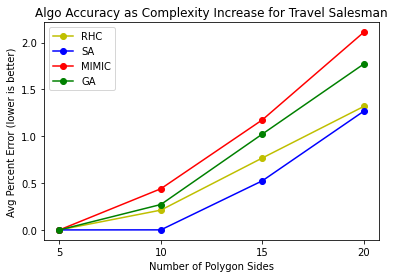

In [35]:
import matplotlib.pyplot as plt



percent_correct_RHC=[0.0017811607033952912, 0.21289492241488434, 0.7689054099414503, 1.3186355243918313]
percent_correct_SA=[0.0017811607033943833, 0.002349747490858052, 0.5254929419791365, 1.2677864416007472]
percent_correct_MIMIC=[0.0017811607033943833, 0.4408796967974785, 1.1754045695627358, 2.109731728980604]
percent_correct_GA=[0.0017811607033943833, 0.27278932814063267, 1.0239882064611332, 1.7710271916444327]

time_to_convergence_RHC=[0.025109140999966258, 0.08067619799995555, 0.1479423030000362, 0.22789726099999824]
time_to_convergence_SA=[0.03513061999992715, 0.07354820000018662, 0.22774713999988308, 0.47231727000007595]
time_to_convergence_MIMIC=[3.327139989999978, 7.430240949999916, 9.07552411000006, 9.875631200000317]
time_to_convergence_GA=[3.327139989999978, 7.430240949999916, 9.07552411000006, 9.875631200000317]


ax=plt.axes()

ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['5','10','15','20'])

plt.plot(percent_correct_RHC,'o-', color="y",
        label="RHC")
plt.plot(percent_correct_SA, 'o-',color="b",
        label="SA")
plt.plot(percent_correct_MIMIC, 'o-',color="r",
        label="MIMIC")
plt.plot(percent_correct_GA, 'o-',color="g",
        label="GA")

#plt.grid()
plt.ylabel('Avg Percent Error (lower is better)')
plt.xlabel('Number of Polygon Sides')
plt.title("Algo Accuracy as Complexity Increase for Travel Salesman")
plt.legend(loc="best")

plt.show()    

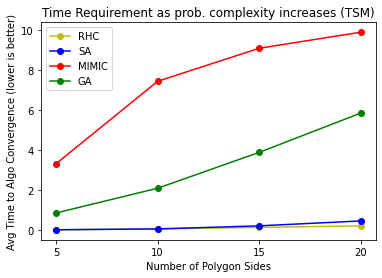

In [41]:
import matplotlib.pyplot as plt



percent_correct_RHC=[0.0017811607033952912, 0.21289492241488434, 0.7689054099414503, 1.3186355243918313]
percent_correct_SA=[0.0017811607033943833, 0.002349747490858052, 0.5254929419791365, 1.2677864416007472]
percent_correct_MIMIC=[0.0017811607033943833, 0.4408796967974785, 1.1754045695627358, 2.109731728980604]
percent_correct_GA=[0.0017811607033943833, 0.27278932814063267, 1.0239882064611332, 1.7710271916444327]

time_to_convergence_RHC=[0.025109140999966258, 0.08067619799995555, 0.1479423030000362, 0.22789726099999824]
time_to_convergence_SA=[0.03513061999992715, 0.07354820000018662, 0.22774713999988308, 0.47231727000007595]
time_to_convergence_MIMIC=[3.327139989999978, 7.430240949999916, 9.07552411000006, 9.875631200000317]
time_to_convergence_GA=[0.8699391799998921, 2.1018425499999465, 3.8878570599999875, 5.84245422999993]




ax=plt.axes()

ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['5','10','15','20'])

plt.plot(time_to_convergence_RHC,'o-', color="y",
        label="RHC")
plt.plot(time_to_convergence_SA, 'o-',color="b",
        label="SA")
plt.plot(time_to_convergence_MIMIC, 'o-',color="r",
        label="MIMIC")
plt.plot(time_to_convergence_GA, 'o-',color="g",
        label="GA")

#plt.grid()
plt.ylabel('Avg Time to Algo Convergence (lower is better)')
plt.xlabel('Number of Polygon Sides')
plt.title("Time Requirement as prob. complexity increases (TSM)")
plt.legend(loc="best")

plt.show()    

In [21]:
#four peaks

In [5]:
#RHC
correct_perc=[]
avg_time=[]
correct_ans_array=[]
leng_arr=[5,10,15,20,25]
iterations=100

for i in range(len(leng_arr)):
    less=.2*leng_arr[i]+1
    correct_ans_array.append(2*leng_arr[i]-less)

print(correct_ans_array)

for j in range(len(leng_arr)):
    fitness = mlrose.FourPeaks(t_pct=.2)
    problem = mlrose.DiscreteOpt(length=leng_arr[j], fitness_fn=fitness, maximize=True, max_val=2)
    correct_ans=correct_ans_array[j]
    result_array=[]
    time_array=[]

    for i in range(iterations):
        tic=time.perf_counter()
        res=random_hill_climb(problem, max_attempts=10, max_iters=1000, restarts=20, init_state=None, curve=False, random_state=None)
        result_array.append(res[1])
        toc = time.perf_counter()
        time_array.append(toc-tic)
    correct_perc.append(result_array.count(correct_ans)/iterations)
    avg_time.append(sum(time_array)/iterations)    


print(correct_perc)
print(avg_time)

[8.0, 17.0, 26.0, 35.0, 44.0]
[1.0, 0.97, 0.33, 0.04, 0.0]
[0.008653764999999395, 0.010671138999999955, 0.009586282000000352, 0.008880109999998921, 0.008006309999999388]


In [6]:
#SA
correct_perc=[]
avg_time=[]
correct_ans_array=[]
leng_arr=[5,10,15,20,25]
iterations=100
j=0

for i in range(len(leng_arr)):
    less=.2*leng_arr[i]+1
    correct_ans_array.append(2*leng_arr[i]-less)

for j in range(len(leng_arr)):
    fitness = mlrose.FourPeaks(t_pct=.2)
    problem = mlrose.DiscreteOpt(length=leng_arr[j], fitness_fn=fitness, maximize=True, max_val=2)
    correct_ans=correct_ans_array[j]
    result_array=[]
    time_array=[]

    for i in range(iterations):
        tic=time.perf_counter()
        res=simulated_annealing(problem, max_attempts=100, max_iters=100, init_state=None, curve=False, random_state=None)
        result_array.append(res[1])
        toc = time.perf_counter()
        time_array.append(toc-tic)
    correct_perc.append(result_array.count(correct_ans)/iterations)
    avg_time.append(sum(time_array)/iterations)    


print(correct_perc)
print(avg_time)    



[0.95, 0.66, 0.47, 0.07, 0.03]
[0.003857391000000234, 0.003953374000001162, 0.0042479149999996935, 0.004010983999998529, 0.004239585000001113]


In [10]:
#MIMIC
correct_perc=[]
avg_time=[]
correct_ans_array=[]
leng_arr=[5,10,15,20,25]

iterations=10
j=0

for i in range(len(leng_arr)):
    less=.2*leng_arr[i]+1
    correct_ans_array.append(2*leng_arr[i]-less)

for j in range(len(leng_arr)):
    fitness = mlrose.FourPeaks(t_pct=.2)
    problem = mlrose.DiscreteOpt(length=leng_arr[j], fitness_fn=fitness, maximize=True, max_val=2)
    correct_ans=correct_ans_array[j]
    result_array=[]
    time_array=[]

    for i in range(iterations):
        tic=time.perf_counter()
        res=mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, max_iters=10000, curve=True, random_state=None, fast_mimic=False)
        result_array.append(res[1])
        toc = time.perf_counter()
        time_array.append(toc-tic)
    correct_perc.append(result_array.count(correct_ans)/iterations)
    avg_time.append(sum(time_array)/iterations)    


print(correct_perc)
print(avg_time)    


[1.0, 1.0, 0.9, 0.6, 0.3]
[0.23757970999999997, 0.817765820000011, 2.1247942200000067, 4.269651799999986, 7.617129770000008]


In [19]:
#GA
correct_perc=[]
avg_time=[]
correct_ans_array=[]
leng_arr=[5,10,15,20,25]
iterations=30
j=0

for i in range(len(leng_arr)):
    less=.2*leng_arr[i]+1
    correct_ans_array.append(2*leng_arr[i]-less)

for j in range(len(leng_arr)):
    fitness = mlrose.FourPeaks(t_pct=.2)
    problem = mlrose.DiscreteOpt(length=leng_arr[j], fitness_fn=fitness, maximize=True, max_val=2)
    correct_ans=correct_ans_array[j]
    result_array=[]
    time_array=[]

    for i in range(iterations):
        tic=time.perf_counter()
        res=mlrose.genetic_alg(problem, random_state = 1000)
        result_array.append(res[1])
        toc = time.perf_counter()
        time_array.append(toc-tic)
    correct_perc.append(result_array.count(correct_ans)/iterations)
    avg_time.append(sum(time_array)/iterations)    


print(correct_perc)
print(avg_time)    

[1.0, 1.0, 1.0, 1.0, 0.0]
[0.2864762199999859, 0.30397198333331893, 0.3881761666666989, 0.4875968633333438, 0.5624910800000331]


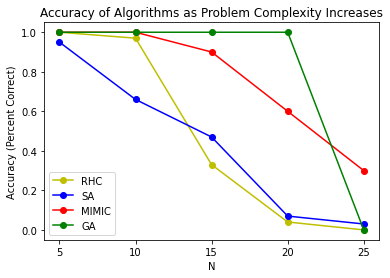

In [15]:
import matplotlib.pyplot as plt

percent_correct_RHC=[1.0, 0.97, 0.33, 0.04, 0.0]
percent_correct_SA=[0.95, 0.66, 0.47, 0.07, 0.03]
percent_correct_MIMIC=[1.0, 1.0, 0.9, 0.6, 0.3]
percent_correct_GA=[1.0, 1.0, 1.0, 1.0, 0.0]

time_to_convergence_RHC=[0.003857391000000234, 0.003953374000001162, 0.0042479149999996935, 0.004010983999998529, 0.004239585000001113]
time_to_convergence_SA=[0.003857391000000234, 0.003953374000001162, 0.0042479149999996935, 0.004010983999998529, 0.004239585000001113]
time_to_convergence_MIMIC=[0.003857391000000234, 0.003953374000001162, 0.0042479149999996935, 0.004010983999998529, 0.004239585000001113]
time_to_convergence_GA=[0.2911167299999988, 0.29993180999999824, 0.3934355800000162, 0.4777957499999843, 0.551041819999989]



grid_search_tit=[.81,6.4,341.6,3.7,]
model_fit_dia=[math.log(.001),math.log(.004),math.log(.037),math.log(.15),math.log(621.1)]
model_fit_tit=[math.log(.007),math.log(.007),math.log(14.7),math.log(.002),math.log(695.3)]
ax=plt.axes()

ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['5','10','15','20',"25"])

plt.plot(percent_correct_RHC,'o-', color="y",
        label="RHC")
plt.plot(percent_correct_SA, 'o-',color="b",
        label="SA")
plt.plot(percent_correct_MIMIC, 'o-',color="r",
        label="MIMIC")
plt.plot(percent_correct_GA, 'o-',color="g",
        label="GA")

#plt.grid()
plt.ylabel('Accuracy (Percent Correct)')
plt.xlabel('N')
plt.title("Accuracy of Algorithms as Problem Complexity Increases")
plt.legend(loc="best")

plt.show()    

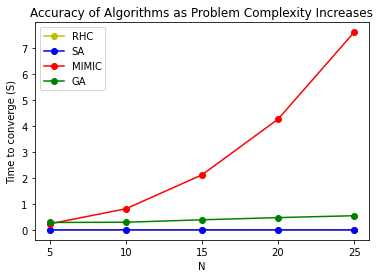

In [31]:
import matplotlib.pyplot as plt

time_to_convergence_RHC=[0.003857391000000234, 0.003953374000001162, 0.0042479149999996935, 0.004010983999998529, 0.004239585000001113]
time_to_convergence_SA=[0.003857391000000234, 0.003953374000001162, 0.0042479149999996935, 0.004010983999998529, 0.004239585000001113]
time_to_convergence_MIMIC=[0.23757970999999997, 0.817765820000011, 2.1247942200000067, 4.269651799999986, 7.617129770000008]
time_to_convergence_GA=[0.2911167299999988, 0.29993180999999824, 0.3934355800000162, 0.4777957499999843, 0.551041819999989]



ax=plt.axes()

ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['5','10','15','20',"25"])

plt.plot(time_to_convergence_RHC,'o-', color="y",
        label="RHC")
plt.plot(time_to_convergence_SA, 'o-',color="b",
        label="SA")
plt.plot(time_to_convergence_MIMIC, 'o-',color="r",
        label="MIMIC")
plt.plot(time_to_convergence_GA, 'o-',color="g",
        label="GA")

#plt.grid()
plt.ylabel('Time to converge (S)')
plt.xlabel('N')
plt.title("Accuracy of Algorithms as Problem Complexity Increases")
plt.legend(loc="best")

plt.show()    